# EDA

### Data Sources

https://www.kaggle.com/ma7555/schengen-visa-stats

https://www.heritage.org/index/

https://worldmap.harvard.edu/data/geonode:country_centroids_az8


### Data Cleaning

In [40]:
import pandas as pd
import numpy as np
%load_ext rpy2.ipython
%R library(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [41]:
# read in dataframes
df2017 = pd.read_csv('2017-data-for-consulates.csv')
df2018 = pd.read_csv('2018-data-for-consulates.csv')

In [42]:
# delete empty rows
df2017 = df2017.loc[(df2017['Schengen State'].notna())]
df2018 = df2018.loc[(df2018['Schengen State'].notna())]

In [43]:
# subset columns and change names
df2017.groupby(df2017['Country where consulate is located'])
df_cols = ['Schengen State', 'Country where consulate is located', 'Consulate', \
           'Total ATVs and uniform visas applied for', \
           'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ']
new_cols = ['Schengen_State', 'Consulate_State', 'Consulate', 'Total_Applications', 'Total_Issued']
df2017 = df2017[df_cols]
df2017.columns = new_cols
df2018 = df2018[df_cols]
df2018.columns = new_cols

In [44]:
# clean two columns
def clean(df):
    for col in df.columns:
        if col == 'Total_Applications' or col == 'Total_Issued':
            df[col] = df[col].str.replace(',','')
            df[col] = df[col].astype(float)
    return df

In [45]:
df2017 = clean(df2017)
df2018 = clean(df2018)

In [46]:
# group by state and get aggregate sums
proportions2017 = df2017.groupby([df2017['Schengen_State']]).agg({'Total_Applications' : 'sum', 'Total_Issued' : 'sum'})
proportions2018 = df2018.groupby([df2018['Schengen_State']]).agg({'Total_Applications' : 'sum', 'Total_Issued' : 'sum'})
proportions2017 = proportions2017.reset_index()
proportions2018 = proportions2018.reset_index()
proportions2018.head(3)

,Schengen_State,Total_Applications,Total_Issued
0,Austria,306147.0,287049.0
1,Belgium,219861.0,174517.0
2,Czech Republic,662902.0,631581.0


In [47]:
# add years and convert from wide to long form
proportions2018['Year'] = pd.Series(['2018' for n in range(len(proportions2018))]) 
proportions2017['Year'] = pd.Series(['2017' for n in range(len(proportions2017))])
new = pd.concat([proportions2018, proportions2017], ignore_index = True)

In [48]:
new['Acceptance_Rate'] = new['Total_Issued'] / new['Total_Applications']
new.sort_values(by = ['Acceptance_Rate', 'Year'])

,Schengen_State,Total_Applications,Total_Issued,Year,Acceptance_Rate
40,Malta,37881.0,27924.0,2017,0.737151
15,Malta,32331.0,25123.0,2018,0.777056
1,Belgium,219861.0,174517.0,2018,0.793761
26,Belgium,231482.0,185888.0,2017,0.803034
19,Portugal,266580.0,222384.0,2018,0.834211
6,France,4012771.0,3350547.0,2018,0.834971
44,Portugal,263538.0,224178.0,2017,0.850648
23,Sweden,253297.0,216238.0,2018,0.853693
16,Netherlands,683505.0,586130.0,2018,0.857536
31,France,3686127.0,3166132.0,2017,0.858932


### Explore data with graphs

In [49]:
# Acceptance (issuance), rejection rates grouped by each country (stacked bar) 
# with heights being total applications. Do 2017 and 2018 side by side

In [50]:
%R -i proportions2017 -i proportions2018 -i new

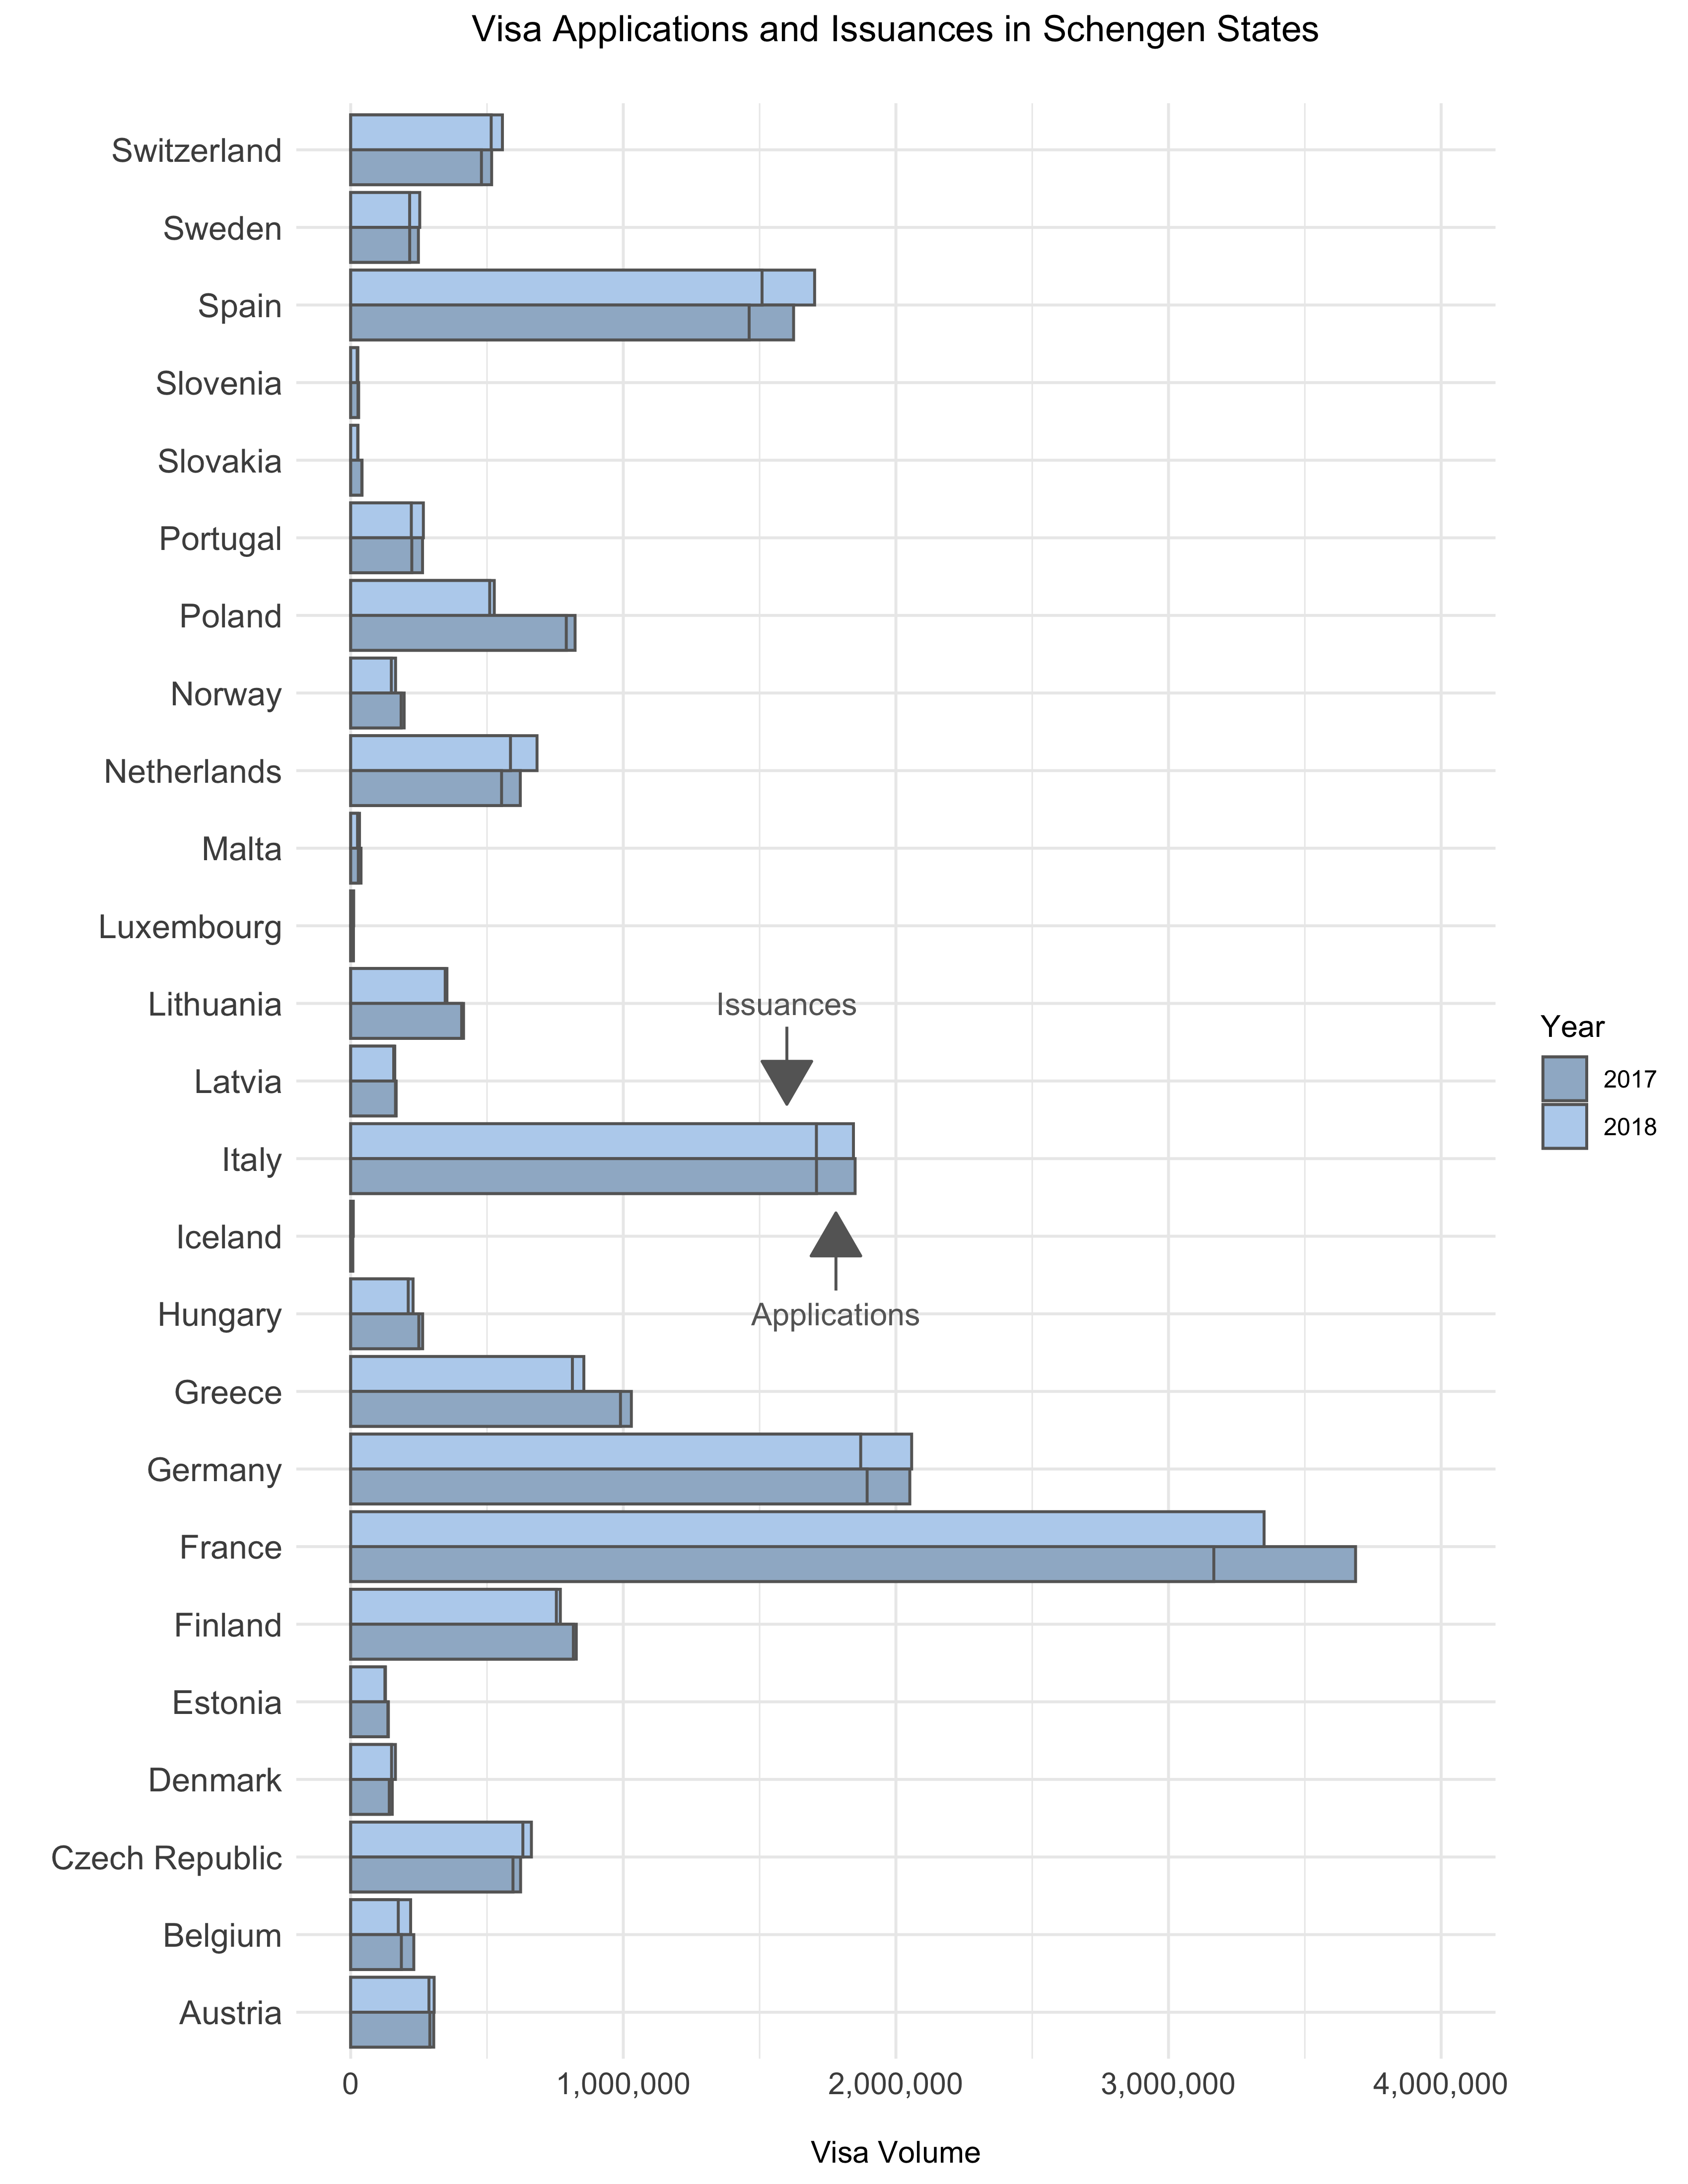

In [51]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 
geom_col(aes(x = Schengen_State, y = Total_Applications, fill = Year), color = 'gray40', position = 'dodge', data = new) +
geom_col(aes(x = Schengen_State, y = Total_Issued, fill = Year), color = 'gray40', position = 'dodge', data = new) +
scale_fill_manual(values = c('2017'='slategray3','2018'='slategray2')) +
scale_y_continuous(limits = c(0, 4000000), breaks = seq(0, 4000000, by = 1000000), labels = scales::comma) +
labs(title = 'Visa Applications and Issuances in Schengen States\n', y = '\nVisa Volume', x = '') +
theme_minimal() +
theme(plot.title = element_text(hjust = 0.5), axis.text.y = element_text(size = 12), axis.text.x = element_text(size = 11))+ 
geom_segment(aes(x = 10.3, y = 1780000, xend = 11.3, yend = 1780000), arrow = arrow(type = 'closed'), color = 'gray40', arrow.fill = 'gray40') +
geom_segment(aes(x = 13.7, y = 1600000, xend = 12.7, yend = 1600000), arrow = arrow(type = 'closed'), color = 'gray40', arrow.fill = 'gray40') +
annotate("text", x = 10, y = 1780000, label = "Applications", size = 4, color = 'gray40') +
annotate("text", x = 14, y = 1600000, label = "Issuances", size = 4, color = 'gray40') +
coord_flip()

#ggsave('Applications_Issuances.pdf')


In [52]:
# we see france has the largest proportions of rejections, 
# but also the highest application volume
# look into how Schengen countries GDPs compare on a line / scatter / treemap 

In [53]:
# read in dfs
efi_2018 = pd.read_csv('index2018_data.csv')
efi_2018.sort_values(by = ['2018 Score'], ascending = False, inplace = True)
efi_2017 = pd.read_csv('index2017_data.csv')
efi_2017.sort_values(by = ['2017 Score'], ascending = False, inplace = True)

In [54]:
# clean columns
efi_columns = ['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', \
               '2018 Score', 'Tariff Rate (%)', 'Trade Freedom', 'Population (Millions)', \
              'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'FDI Inflow (Millions)', \
               'Unemployment (%)', 'Inflation (%)', 'Public Debt (% of GDP)']
efi_columns2 = ['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', \
               '2017 Score', 'Tariff Rate (%)', 'Trade Freedom', 'Population (Millions)', \
              'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'FDI Inflow (Millions)', \
               'Unemployment (%)', 'Inflation (%)', 'Public Debt (% of GDP)']
efi_2018 = efi_2018[efi_columns]
efi_2017 = efi_2017[efi_columns2]
efi_2018.columns = ['CountryID', 'Country_Name', 'Region', 'World_Rank', 'Region_Rank', \
               'Score_2018', 'Tariff_Rate_Pct', 'Trade_Freedom', 'Population_MM', \
              'GDP_Billions_PPP', 'GDP_per_Capita_PPP', 'FDI_Inflow_MM', \
               'Unemployment_Pct', 'Inflation_Pct', 'Public_Debt_PctofGDP']
efi_2017.columns = ['CountryID', 'Country_Name', 'Region', 'World_Rank', 'Region_Rank', \
               'Score_2017', 'Tariff_Rate_Pct', 'Trade_Freedom', 'Population_MM', \
              'GDP_Billions_PPP', 'GDP_per_Capita_PPP', 'FDI_Inflow_MM', \
               'Unemployment_Pct', 'Inflation_Pct', 'Public_Debt_PctofGDP']
efi_2018.head(3)

,CountryID,Country_Name,Region,World_Rank,Region_Rank,Score_2018,Tariff_Rate_Pct,Trade_Freedom,Population_MM,GDP_Billions_PPP,GDP_per_Capita_PPP,FDI_Inflow_MM,Unemployment_Pct,Inflation_Pct,Public_Debt_PctofGDP
70,71,Hong Kong,Asia-Pacific,1.0,1.0,90.2,0.0,90.0,7.4,$429.7,"$58,321.6","108,126.0",3.4,2.6,0.1
146,147,Singapore,Asia-Pacific,2.0,2.0,88.8,0.0,90.0,5.6,$492.6,"$87,855.4","61,596.7",1.8,-0.5,112.0
119,120,New Zealand,Asia-Pacific,3.0,3.0,84.2,1.3,87.4,4.7,$177.0,"$37,294.0","2,291.6",5.2,0.6,29.5


In [55]:
#drop na
efi_2018 = efi_2018.loc[(efi_2018['Country_Name'].notna())]
efi_2017 = efi_2017.loc[(efi_2017['Country_Name'].notna())]

In [56]:
# get just Schengen countries
schengen_efi_2017 = efi_2017.loc[(efi_2017['Country_Name'].isin(['Austria', 'Belgium', 'Czech Republic', \
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', \
        'Iceland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', \
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', \
       'Slovenia', 'Spain', 'Sweden', 'Switzerland']))]
schengen_efi_2018 = efi_2018.loc[(efi_2018['Country_Name'].isin(['Austria', 'Belgium', 'Czech Republic', \
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', \
        'Iceland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', \
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', \
       'Slovenia', 'Spain', 'Sweden', 'Switzerland']))]

In [57]:
# add year and merge dfs
schengen_efi_2018['Year'] = pd.Series([2018 for n in range(len(schengen_efi_2018))])
schengen_efi_2017['Year'] = pd.Series([2017 for n in range(len(schengen_efi_2017))])

gdp = schengen_efi_2018.merge(schengen_efi_2017, on = 'Country_Name', how = 'left')


/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
gdp = pd.melt(gdp, id_vars = ['CountryID_x'], value_vars = ['GDP_Billions_PPP_x','GDP_Billions_PPP_y'])
gdp.sample(10).T

,5,0,3,25,42,28,34,36,26,37
CountryID_x,157,158,45,54,152,99,44,92,73,8
variable,GDP_Billions_PPP_x,GDP_Billions_PPP_x,GDP_Billions_PPP_x,GDP_Billions_PPP_y,GDP_Billions_PPP_y,GDP_Billions_PPP_y,GDP_Billions_PPP_y,GDP_Billions_PPP_y,GDP_Billions_PPP_y,GDP_Billions_PPP_y
value,$498.1,$496.0,$273.9,$37.5,"$1,615.1",$55.7,$332.5,$49.1,$15.2,$404.3


In [59]:
countries = schengen_efi_2018[['CountryID', 'Country_Name']]

In [60]:
gdp = gdp.merge(countries, left_on = 'CountryID_x', right_on = 'CountryID', how = 'left')
#gdp = gdp.drop(['CountryID_x', 'CountryID'], axis = 1)
gdp.loc[(gdp.variable == 'GDP_Billions_PPP_x'), 'Year'] = 2018
gdp.loc[(gdp.variable == 'GDP_Billions_PPP_y'), 'Year'] = 2017
gdp

,CountryID_x,variable,value,CountryID,Country_Name,Year
0,158,GDP_Billions_PPP_x,$496.0,158,Switzerland,2018.0
1,54,GDP_Billions_PPP_x,$38.5,54,Estonia,2018.0
2,73,GDP_Billions_PPP_x,$16.5,73,Iceland,2018.0
3,45,GDP_Billions_PPP_x,$273.9,45,Denmark,2018.0
4,99,GDP_Billions_PPP_x,$59.9,99,Luxembourg,2018.0
5,157,GDP_Billions_PPP_x,$498.1,157,Sweden,2018.0
6,119,GDP_Billions_PPP_x,$869.4,119,Netherlands,2018.0
7,98,GDP_Billions_PPP_x,$86.1,98,Lithuania,2018.0
8,124,GDP_Billions_PPP_x,$364.4,124,Norway,2018.0
9,62,GDP_Billions_PPP_x,"$3,980.3",62,Germany,2018.0


In [61]:
gdp = gdp.drop(['CountryID_x', 'CountryID', 'variable'], axis = 1)

In [62]:
gdp.columns = ['GDP', 'Country', 'Year']

In [63]:
gdp['GDP'] = gdp['GDP'].str.replace('$','')
gdp['GDP'] = gdp['GDP'].str.replace(',','')
gdp['GDP'] = gdp['GDP'].astype(float)

In [64]:
%R -i gdp

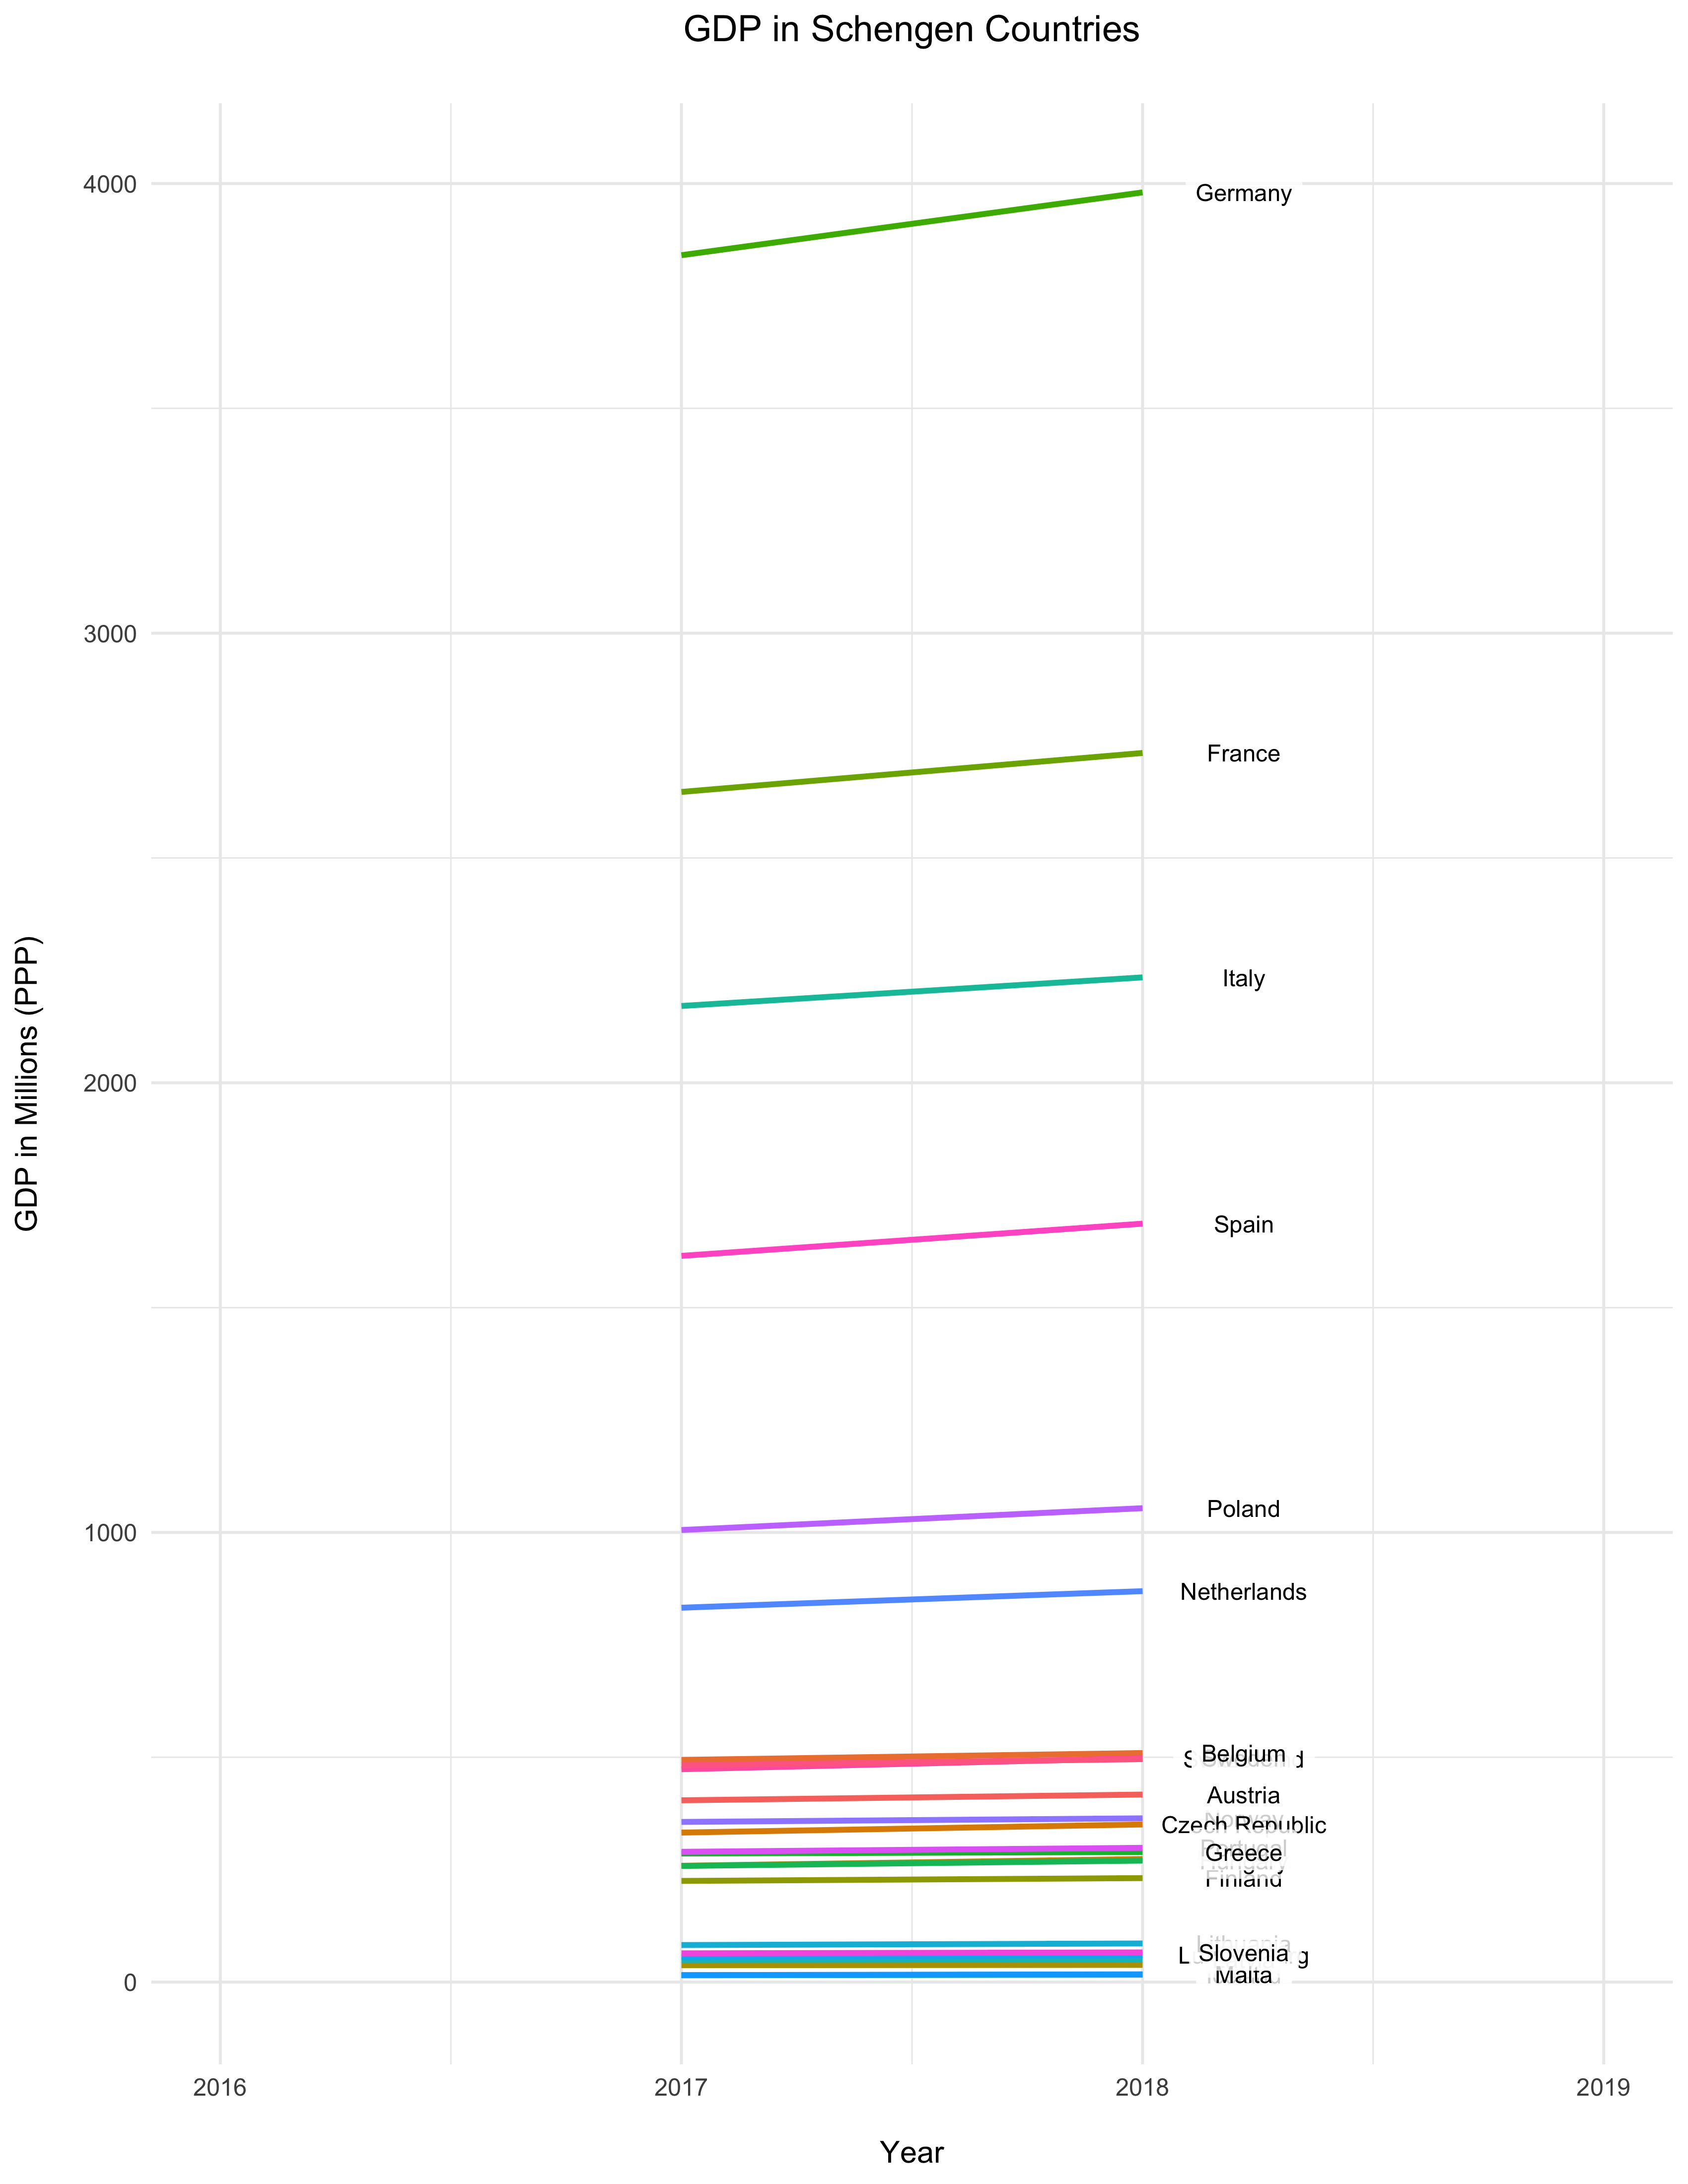

In [65]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 
    geom_line(aes(x = Year, y = GDP, group = Country, color = Country), size = 1, data = gdp) +
    scale_x_continuous(limits = c(2016, 2019), breaks = seq(2016, 2019, by = 1)) +
    geom_label(aes(x = Year, y = GDP, label = Country), alpha = ifelse(gdp$Year == 2018, 0.8, 0), nudge_x = 0.22, color = ifelse(gdp$Year == 2018, 1, 0), size = 3, alpha = 0.6, label.size = 0, data = gdp) +
    labs(title = 'GDP in Schengen Countries\n', y = 'GDP in Millions (PPP)\n', x = '\nYear') +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5), legend.position = 'none')

# fix y axis scale


In [66]:
%R -i new

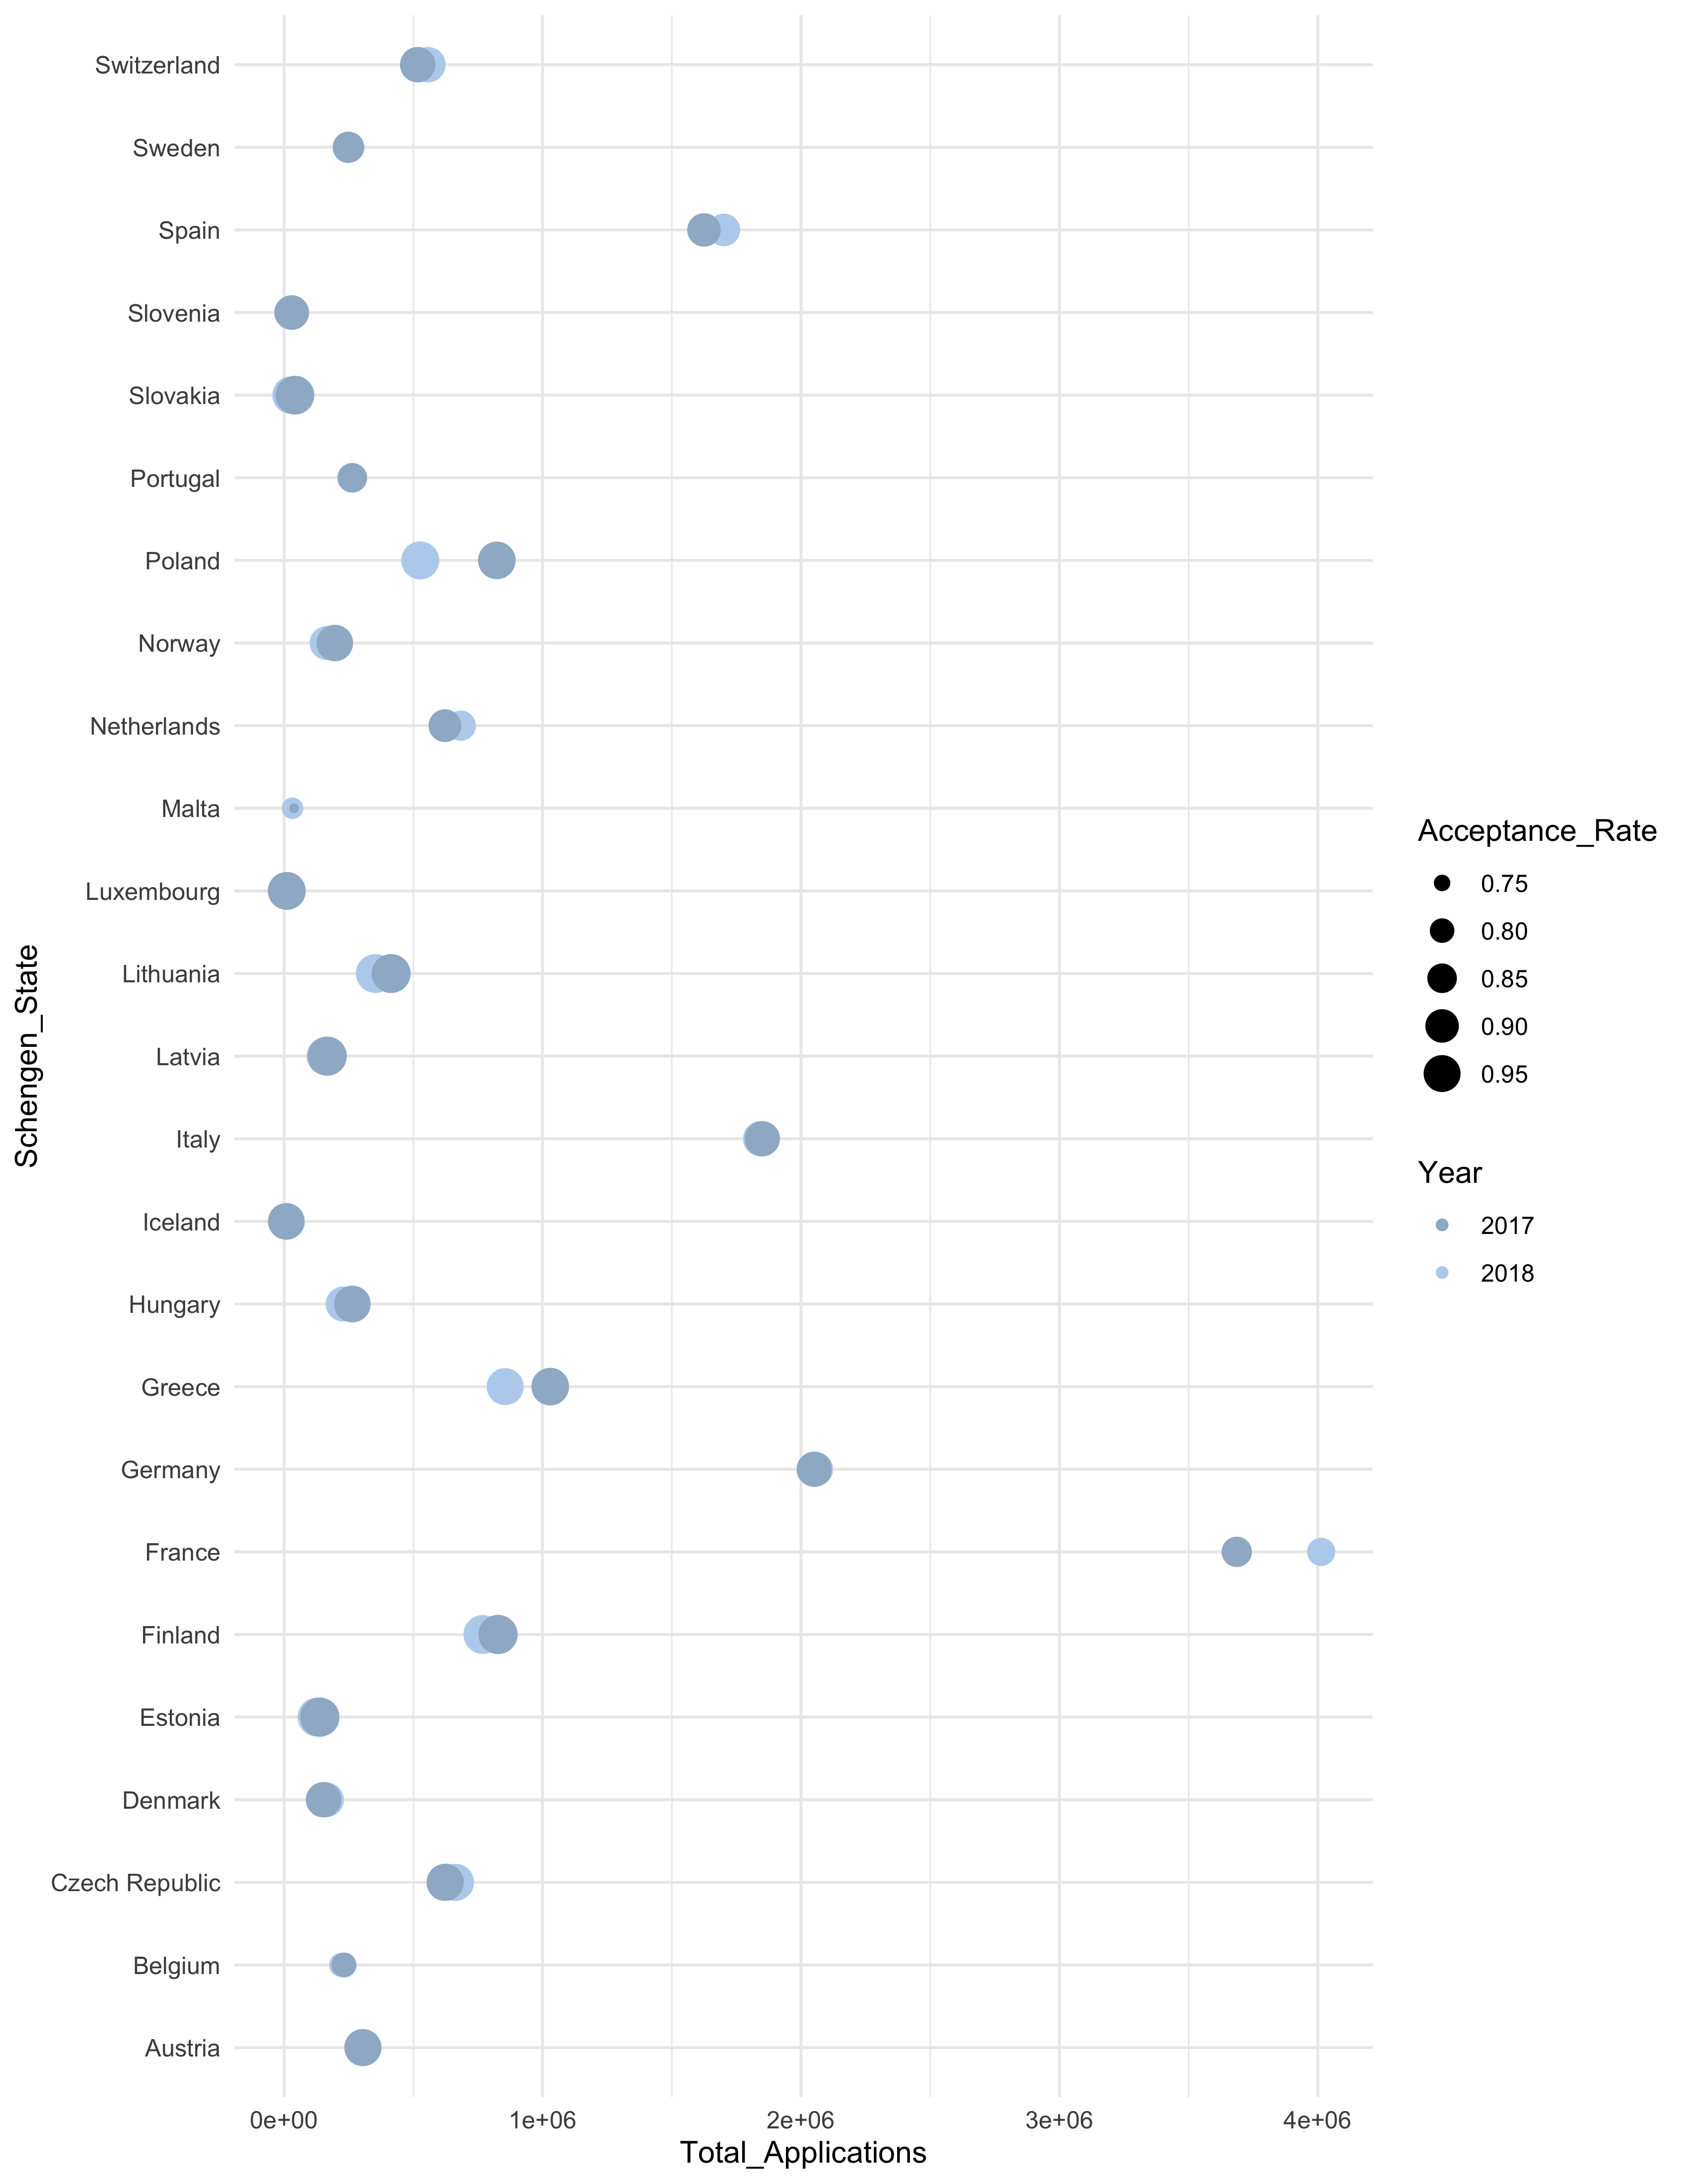

In [67]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 
geom_point(aes(x = Schengen_State, y = Total_Applications, size = Acceptance_Rate, color = Year), data = new) +
scale_color_manual(values = c('2017'='slategray3','2018'='slategray2')) +
theme_minimal() +
coord_flip()

# make 2018 dots on top of 2017 dots

In [68]:
gdp.Year = gdp.Year.astype(str)
gdp.Year = gdp.Year.str[0:4]
joined = gdp.merge(new, left_on = ['Country','Year'], right_on = ['Schengen_State', 'Year'], how = 'left')
joined

,GDP,Country,Year,Schengen_State,Total_Applications,Total_Issued,Acceptance_Rate
0,496.0,Switzerland,2018,Switzerland,556572.0,515339.0,0.925916
1,38.5,Estonia,2018,Estonia,127561.0,125513.0,0.983945
2,16.5,Iceland,2018,Iceland,9334.0,8856.0,0.948789
3,273.9,Denmark,2018,Denmark,164027.0,149920.0,0.913996
4,59.9,Luxembourg,2018,Luxembourg,10877.0,10475.0,0.963041
5,498.1,Sweden,2018,Sweden,253297.0,216238.0,0.853693
6,869.4,Netherlands,2018,Netherlands,683505.0,586130.0,0.857536
7,86.1,Lithuania,2018,Lithuania,353059.0,346626.0,0.981779
8,364.4,Norway,2018,Norway,164594.0,149089.0,0.905799
9,3980.3,Germany,2018,Germany,2057743.0,1870821.0,0.909162


In [69]:
%R -i joined

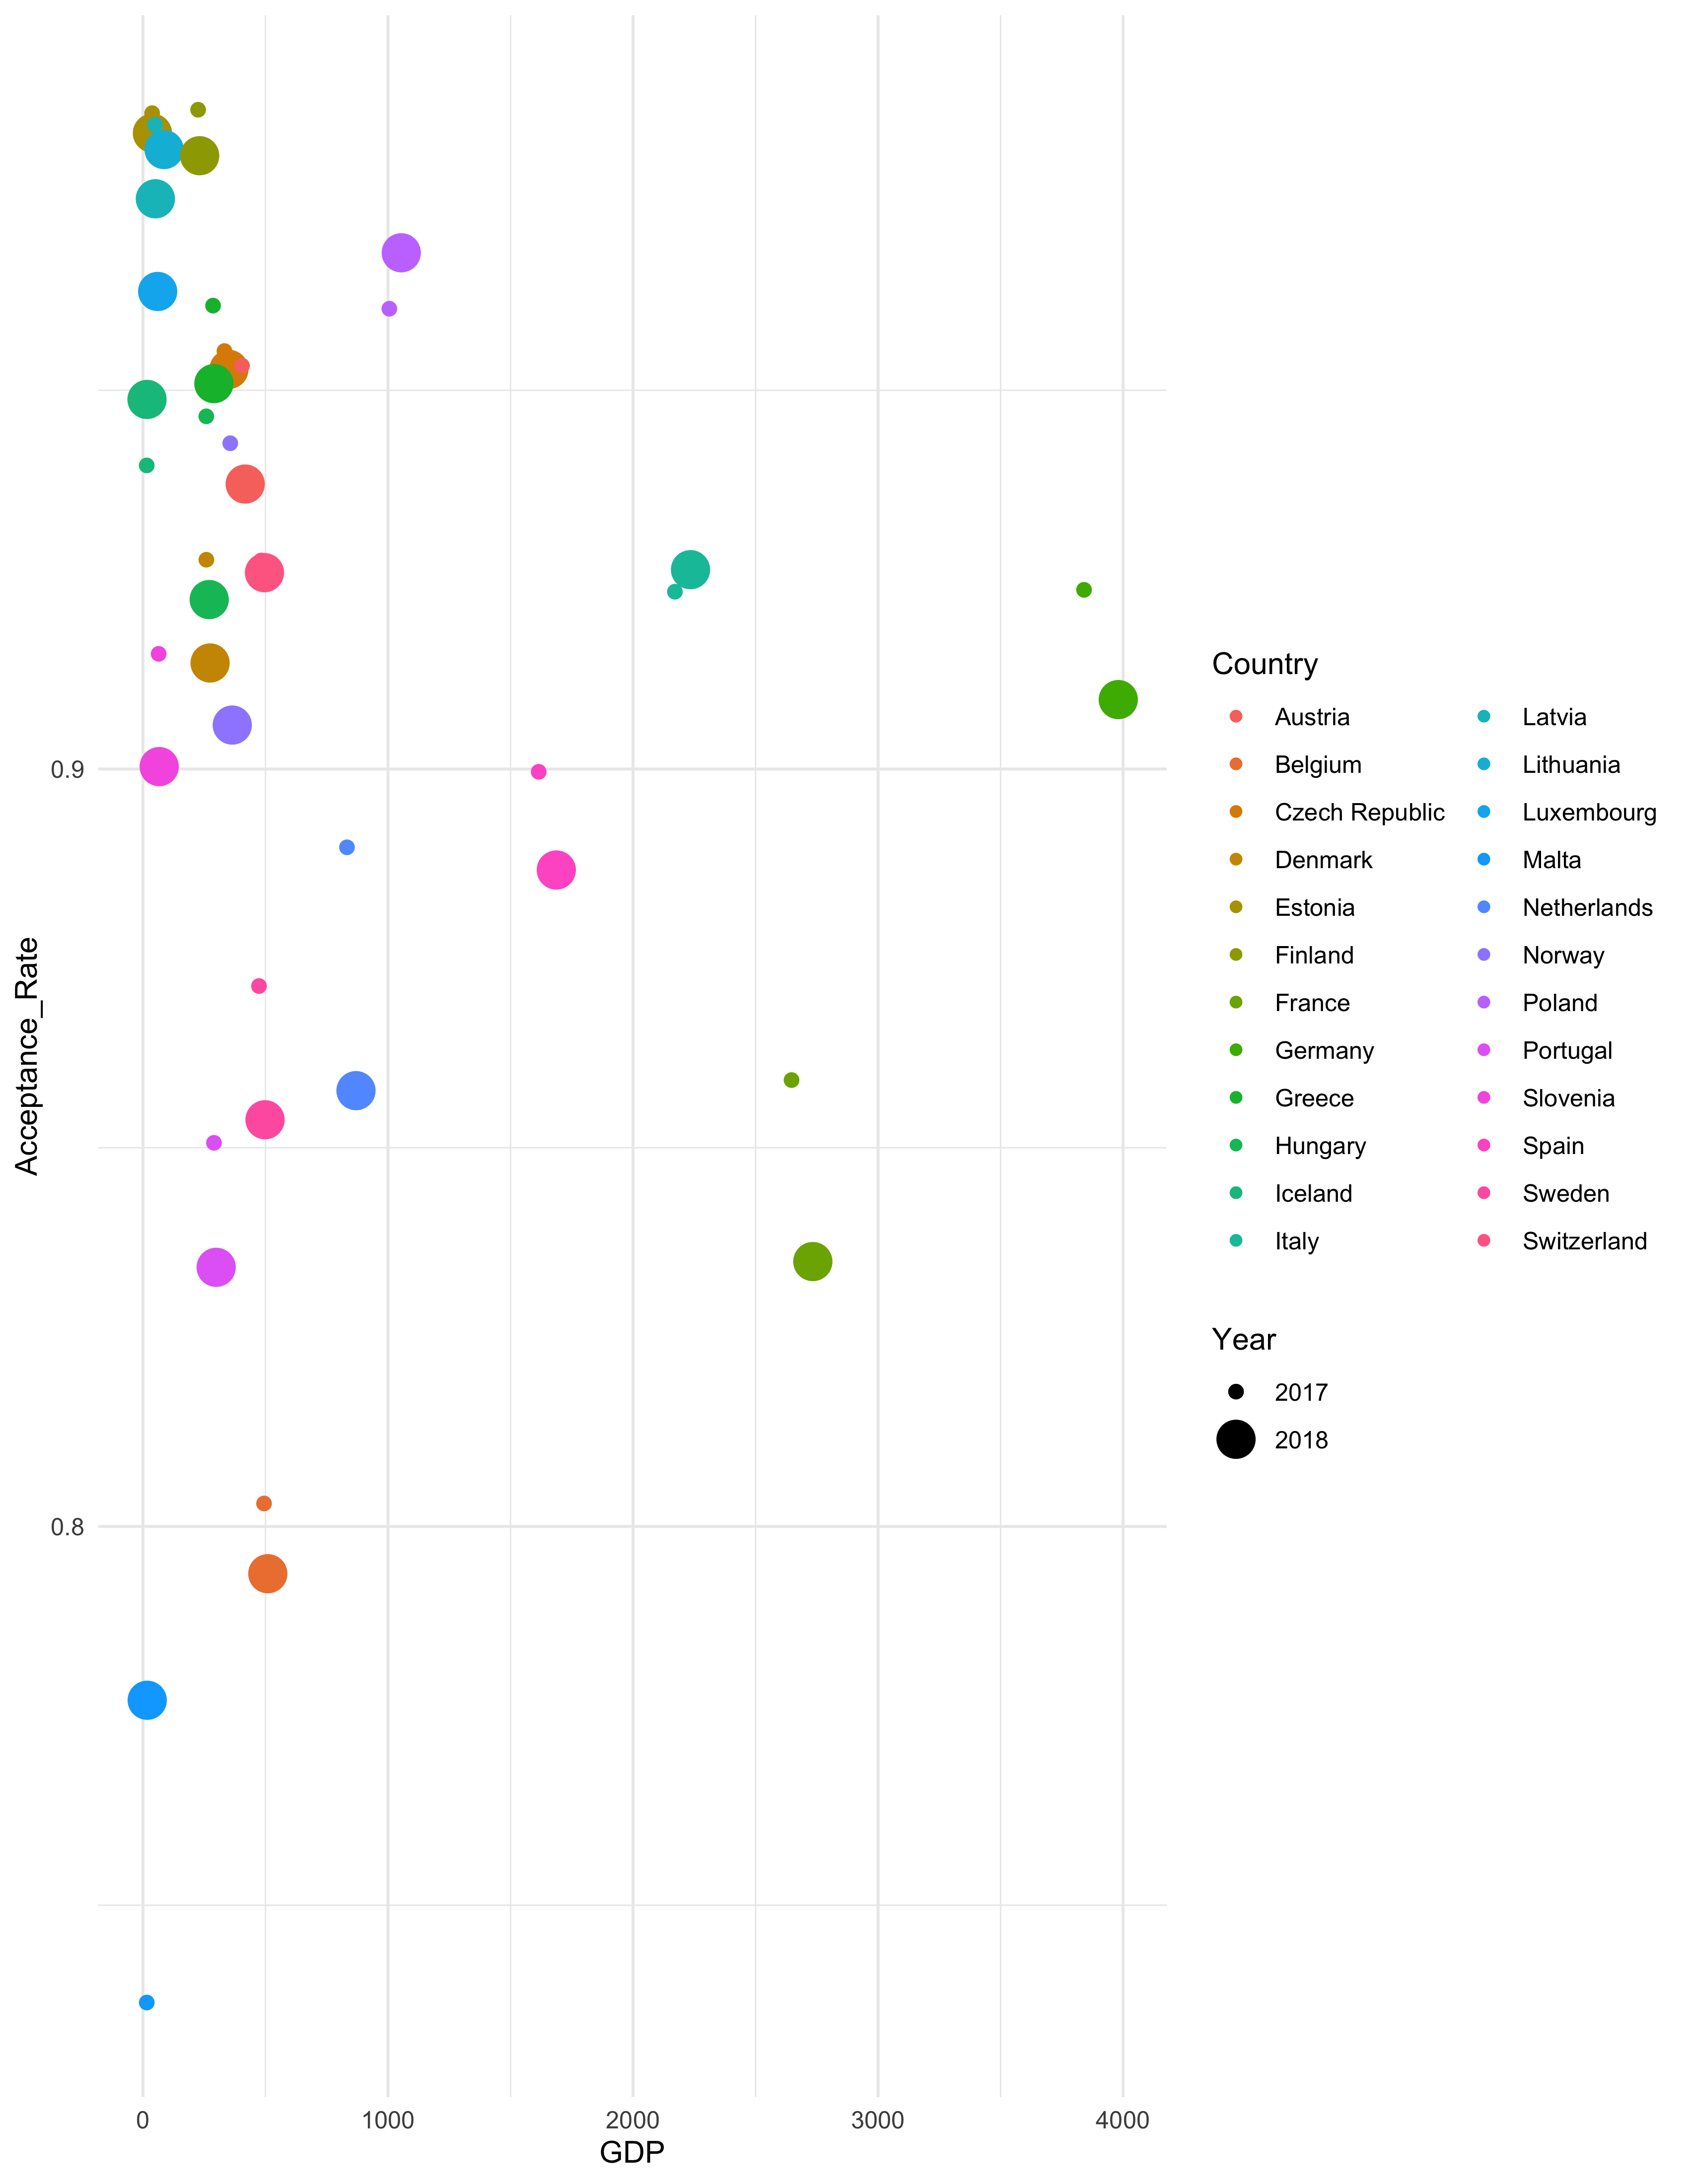

In [70]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 
geom_point(aes(x = Acceptance_Rate, y = GDP, size = Year, color = Country), data = joined) +
theme_minimal() +
coord_flip()

# add labels

In [71]:
# population versus visas issued? 

In [72]:
# stack bar of apps to each country and the applying countries

In [73]:
gdp_change = gdp.pivot(index='Country', columns='Year').reset_index()
gdp_change.columns = gdp_change.columns = ['Country', '2017', '2018']
gdp_change

,Country,2017,2018
0,Austria,404.3,417.2
1,Belgium,494.1,509.5
2,Czech Republic,332.5,350.7
3,Denmark,258.7,273.9
4,Estonia,37.5,38.5
5,Finland,225.0,231.4
6,France,2646.9,2733.7
7,Germany,3840.6,3980.3
8,Greece,286.0,289.4
9,Hungary,258.4,270.3


In [74]:
gdp_change['Diff'] = (gdp_change['2018'] - gdp_change['2017']) / gdp_change['2017']
gdp_change.loc[(gdp_change['Diff'] >= 0), 'Flag'] = 0
gdp_change.loc[(gdp_change['Diff'] < 0), 'Flag'] = 1
gdp_change['Diff'] = gdp_change['Diff'].apply(lambda x: "{:.2%}".format(x))

In [75]:
gdp_change.to_csv('gdp_change.csv', index = False)

In [76]:
gdp_change

,Country,2017,2018,Diff,Flag
0,Austria,404.3,417.2,3.19%,0.0
1,Belgium,494.1,509.5,3.12%,0.0
2,Czech Republic,332.5,350.7,5.47%,0.0
3,Denmark,258.7,273.9,5.88%,0.0
4,Estonia,37.5,38.5,2.67%,0.0
5,Finland,225.0,231.4,2.84%,0.0
6,France,2646.9,2733.7,3.28%,0.0
7,Germany,3840.6,3980.3,3.64%,0.0
8,Greece,286.0,289.4,1.19%,0.0
9,Hungary,258.4,270.3,4.61%,0.0


In [77]:
sch = pd.read_csv('cleaned_schengen.csv')

In [78]:
nonsch = pd.read_csv('cleaned_nonschengen.csv')

In [79]:
func = lambda x, y: y if np.isnan(x) else x

In [80]:
s18 = sch.loc[(sch.Year == 2018)].EFI_Score

In [81]:
s17 = sch.loc[(sch.Year == 2017)].EFI_Score

In [82]:
score = s18.combine(s17, func)
score

0     72.3
1     71.8
2     67.8
3     67.5
4     75.1
5     76.6
6     74.0
7     74.1
8     63.3
9     63.9
10    73.8
11    74.2
12    55.0
13    57.3
14    65.8
15    66.7
16    62.5
17    62.5
18    73.6
19    75.9
20    76.4
21    67.7
22    75.8
23    76.2
24    68.3
25    68.5
26    62.6
27    63.4
28    64.8
29    63.6
30    65.1
31    74.9
32    76.3
33    81.5
34    81.7
Name: EFI_Score, dtype: float64

In [83]:
new_sch = pd.concat([sch, score], axis = 1, ignore_index = True)
new_sch

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,2017,82,1,83,0.987952,8.0,AUSTRIA,Europe,30.0,...,$404.3,0.9,1.0,"$47,250",5.7,0.8,"3,837.4",86.2,72.3,72.3
1,1,2018,49,13,62,0.790323,8.0,AUSTRIA,Europe,32.0,...,$417.2,0.9,0.8,"$48,004.7",6.1,1.0,"-6,088.5",83.9,71.8,71.8
2,2,2017,44,2,46,0.956522,15.0,BELGIUM,Europe,49.0,...,$494.1,1.4,0.9,"$43,585",8.7,0.6,"31,029.5",106.3,67.8,67.8
3,3,2018,35,4,39,0.897436,15.0,BELGIUM,Europe,52.0,...,$509.5,1.4,0.9,"$45,046.9",8.3,1.8,"33,102.7",105.5,67.5,67.5
4,4,2017,553,1,554,0.998195,45.0,DENMARK,Europe,18.0,...,$258.7,1.2,0.7,"$45,709",6.3,0.5,"3,641.5",45.6,75.1,75.1
5,5,2018,722,7,729,0.990398,45.0,DENMARK,Europe,12.0,...,$273.9,1.2,1.1,"$47,985.4",6.1,0.3,950.7,39.9,76.6,76.6
6,6,2017,12,2,14,0.857143,57.0,FINLAND,Europe,24.0,...,$225.0,0.4,0.0,"$41,120",9.6,-0.2,"8,289.6",62.4,74.0,74.0
7,7,2018,11,2,13,0.846154,57.0,FINLAND,Europe,26.0,...,$231.4,0.4,-0.2,"$42,164.6",9.0,0.4,42.0,63.6,74.1,74.1
8,8,2017,40,2,42,0.952381,58.0,FRANCE,Europe,72.0,...,"$2,646.9",1.1,0.8,"$41,181",10.6,0.1,"42,882.6",96.8,63.3,63.3
9,9,2018,84,4,88,0.954545,58.0,FRANCE,Europe,71.0,...,"$2,733.7",1.1,0.8,"$42,314.0",10.0,0.3,"28,351.6",96.6,63.9,63.9


In [84]:
new_cols = ['Unnamed: 0', 'Year', 'Total_Issued', 'Total_Not_Issued', 'Total',
       'Acceptance_Rate', 'CountryID', 'Country_Name', 'Region', 'World_Rank',
       'Region_Rank', 'Property_Rights', 'Judical_Effectiveness',
       'Government_Integrity', 'Tax_Burden', 'Gov_Spending', 'Fiscal_Health',
       'Business_Freedom', 'Labor_Freedom', 'Monetary_Freedom',
       'Trade_Freedom', 'Investment_Freedom_', 'Financial_Freedom',
       'Tariff_Rate', 'Income_Tax_Rate', 'Corporate_Tax_Rate',
       'Tax_Burden_pct_GDP', 'Gov_Expenditure_pct_of_GDP', 'Country_y',
       'Population_MM', 'GDP_Billions_PPP', 'GDP_Growth_Rate_',
       'Five_Year_GDP_Growth_Rate', 'GDP_per_Capita_PPP', 'Unemployment',
       'Inflation', 'FDI_Inflow_MM', 'Public_Debt_pct_GDP', 'EFI_Score', 'Score']

In [85]:
new_sch.columns = new_cols

In [86]:
new_sch.columns

Index(['Unnamed: 0', 'Year', 'Total_Issued', 'Total_Not_Issued', 'Total',
       'Acceptance_Rate', 'CountryID', 'Country_Name', 'Region', 'World_Rank',
       'Region_Rank', 'Property_Rights', 'Judical_Effectiveness',
       'Government_Integrity', 'Tax_Burden', 'Gov_Spending', 'Fiscal_Health',
       'Business_Freedom', 'Labor_Freedom', 'Monetary_Freedom',
       'Trade_Freedom', 'Investment_Freedom_', 'Financial_Freedom',
       'Tariff_Rate', 'Income_Tax_Rate', 'Corporate_Tax_Rate',
       'Tax_Burden_pct_GDP', 'Gov_Expenditure_pct_of_GDP', 'Country_y',
       'Population_MM', 'GDP_Billions_PPP', 'GDP_Growth_Rate_',
       'Five_Year_GDP_Growth_Rate', 'GDP_per_Capita_PPP', 'Unemployment',
       'Inflation', 'FDI_Inflow_MM', 'Public_Debt_pct_GDP', 'EFI_Score',
       'Score'],
      dtype='object')

In [87]:
#new_sch.to_csv('cleaned_schengen.csv')

In [88]:
total = pd.read_csv('All_Rows.csv')

In [89]:
schengen_countries = ['Austria', 'Belgium', 'Czech Republic', \
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', \
        'Iceland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', \
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', \
       'Slovenia', 'Spain', 'Sweden', 'Switzerland']

In [90]:
total.loc[(total.Country_y.isin(schengen_countries)), 'Schengen_F'] = 1
total.loc[~(total.Country_y.isin(schengen_countries)), 'Schengen_F'] = 0

In [91]:
total.to_csv('All_Rows.csv')

In [92]:
sch = pd.read_csv('cleaned_schengen.csv')
nonsch = pd.read_csv('cleaned_nonschengen.csv')

In [93]:
nonsch.columns

Index(['Unnamed: 0', 'Year', 'Total_Issued', 'Total_Not_Issued', 'Total',
       'Acceptance_Rate', 'CountryID', 'Country_Name', 'Region', 'World_Rank',
       'Region_Rank', 'Property_Rights', 'Judical_Effectiveness',
       'Government_Integrity', 'Tax_Burden', 'Gov_Spending', 'Fiscal_Health',
       'Business_Freedom', 'Labor_Freedom', 'Monetary_Freedom',
       'Trade_Freedom', 'Investment_Freedom_', 'Financial_Freedom',
       'Tariff_Rate', 'Income_Tax_Rate', 'Corporate_Tax_Rate',
       'Tax_Burden_pct_GDP', 'Gov_Expenditure_pct_of_GDP', 'Country_y',
       'Population_MM', 'GDP_Billions_PPP', 'GDP_Growth_Rate_',
       'Five_Year_GDP_Growth_Rate', 'GDP_per_Capita_PPP', 'Unemployment',
       'Inflation', 'FDI_Inflow_MM', 'Public_Debt_pct_GDP', 'EFI_Score'],
      dtype='object')

In [94]:
nonsch_2018 = nonsch.loc[(nonsch.Year == 2018)]
nonsch_2018 = nonsch_2018.groupby('Country_y').agg({'Total' : 'sum'}).reset_index()

In [95]:
nonsch_2018.sort_values(by = ['Total'], ascending = False, inplace = True)
top_20 = nonsch_2018.nlargest(20, columns = 'Total')

In [96]:
top_20

,Country_y,Total
25,China,2809614
46,India,1077382
106,Turkey,875194
2,Algeria,710657
10,Belarus,679418
72,Morocco,650350
89,Saudi Arabia,354940
101,Thailand,330837
48,Iran,271084
111,United Kingdom,270372


In [97]:
from colour import Color
colors = list(Color("#CAEAFA").range_to(Color('#185878'), 20))

li = [c.hex for c in colors]

In [98]:
%R -i top_20 -i li

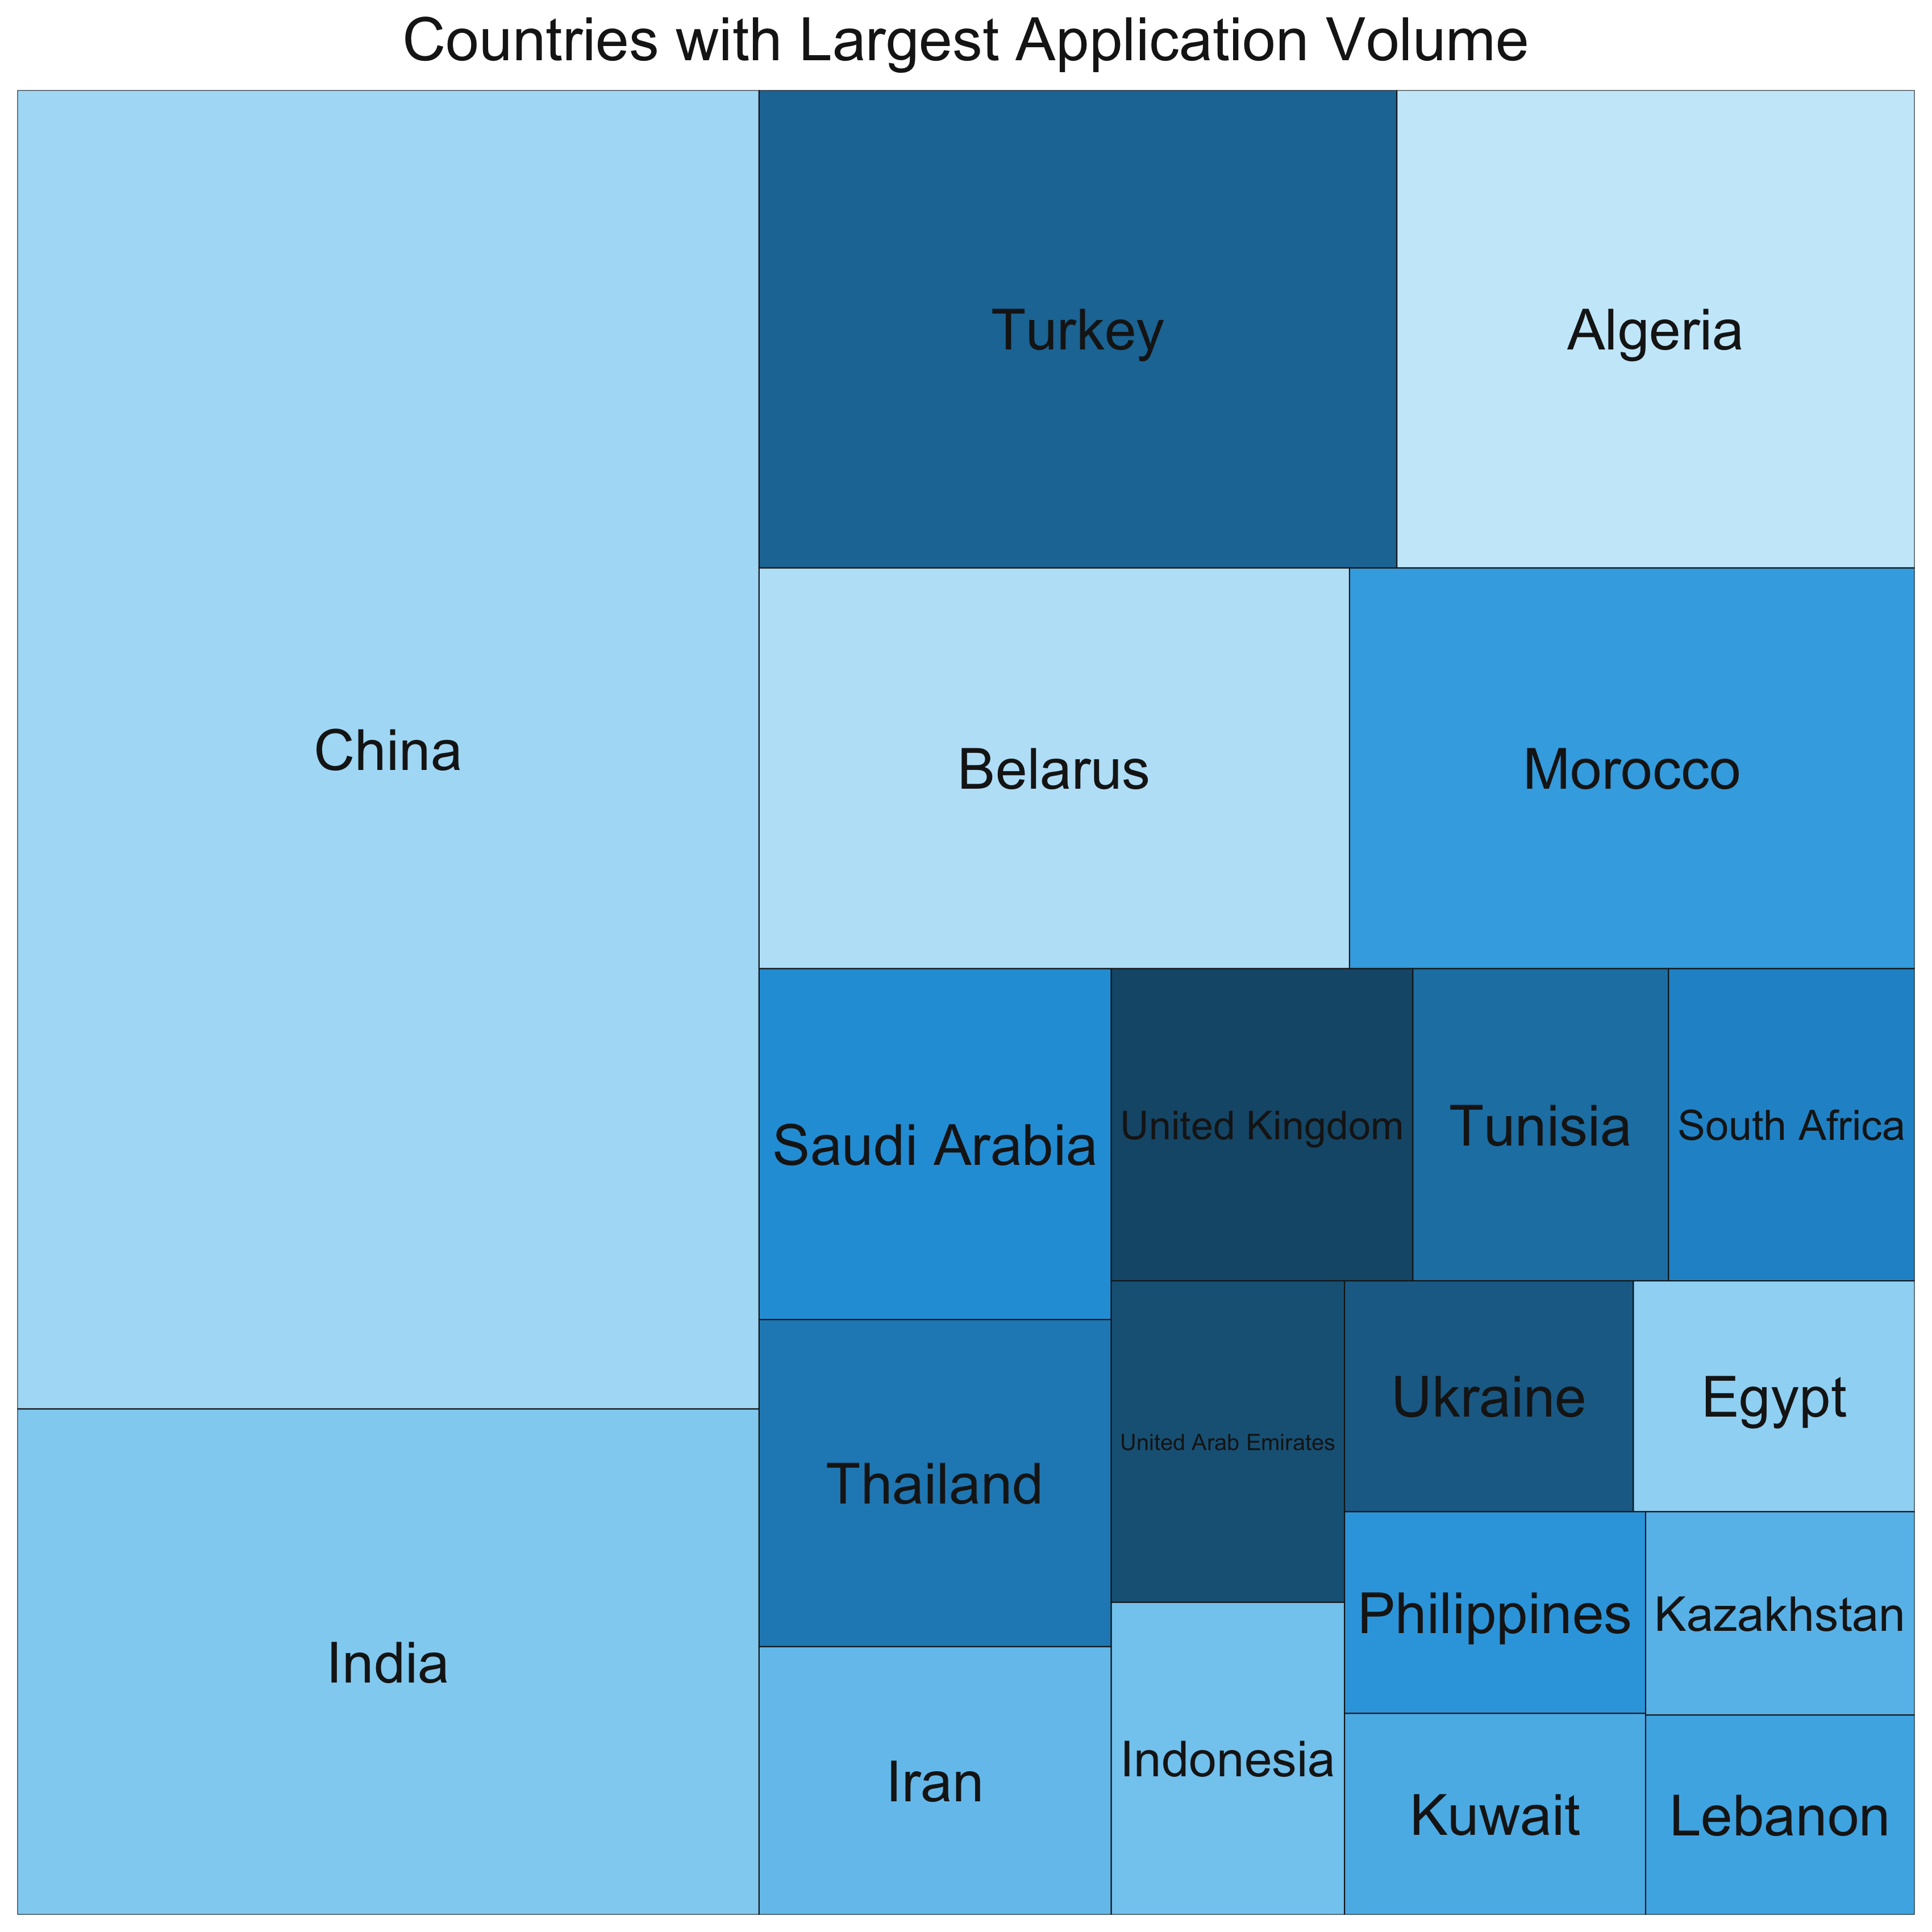

In [104]:
%%R -w 8.5 -h 8.5 --units in -r 400

library(treemapify)

ggplot() +
    geom_treemap(aes(area = Total, fill = Country_y), start = 'topleft', color = 'grey10', data = top_20) +
    geom_treemap_text(aes(area = Total, label = Country_y), start = 'topleft', colour = 'grey10', place = 'center', data = top_20) +
    labs(title = 'Countries with Largest Application Volume') +
    scale_fill_manual(values = c(li)) + 
    theme(legend.position = 'none', plot.title = element_text(hjust = 0.5, size = 19, color = 'grey10'))

#ggsave('treemap.png')
                                 
                                 

In [107]:
sch = sch.loc[(sch.Year == 2018)]
sch = sch.groupby('Country_y').agg({'Total' : 'sum'}).reset_index()
sch.sort_values(by = ['Total'], ascending = False, inplace = True)

In [108]:
sch

,Country_y,Total
11,Netherlands,1012
2,Denmark,729
15,Spain,254
5,Germany,157
8,Italy,103
16,Sweden,92
4,France,88
14,Slovenia,73
0,Austria,62
6,Greece,62


In [109]:
%R -i sch

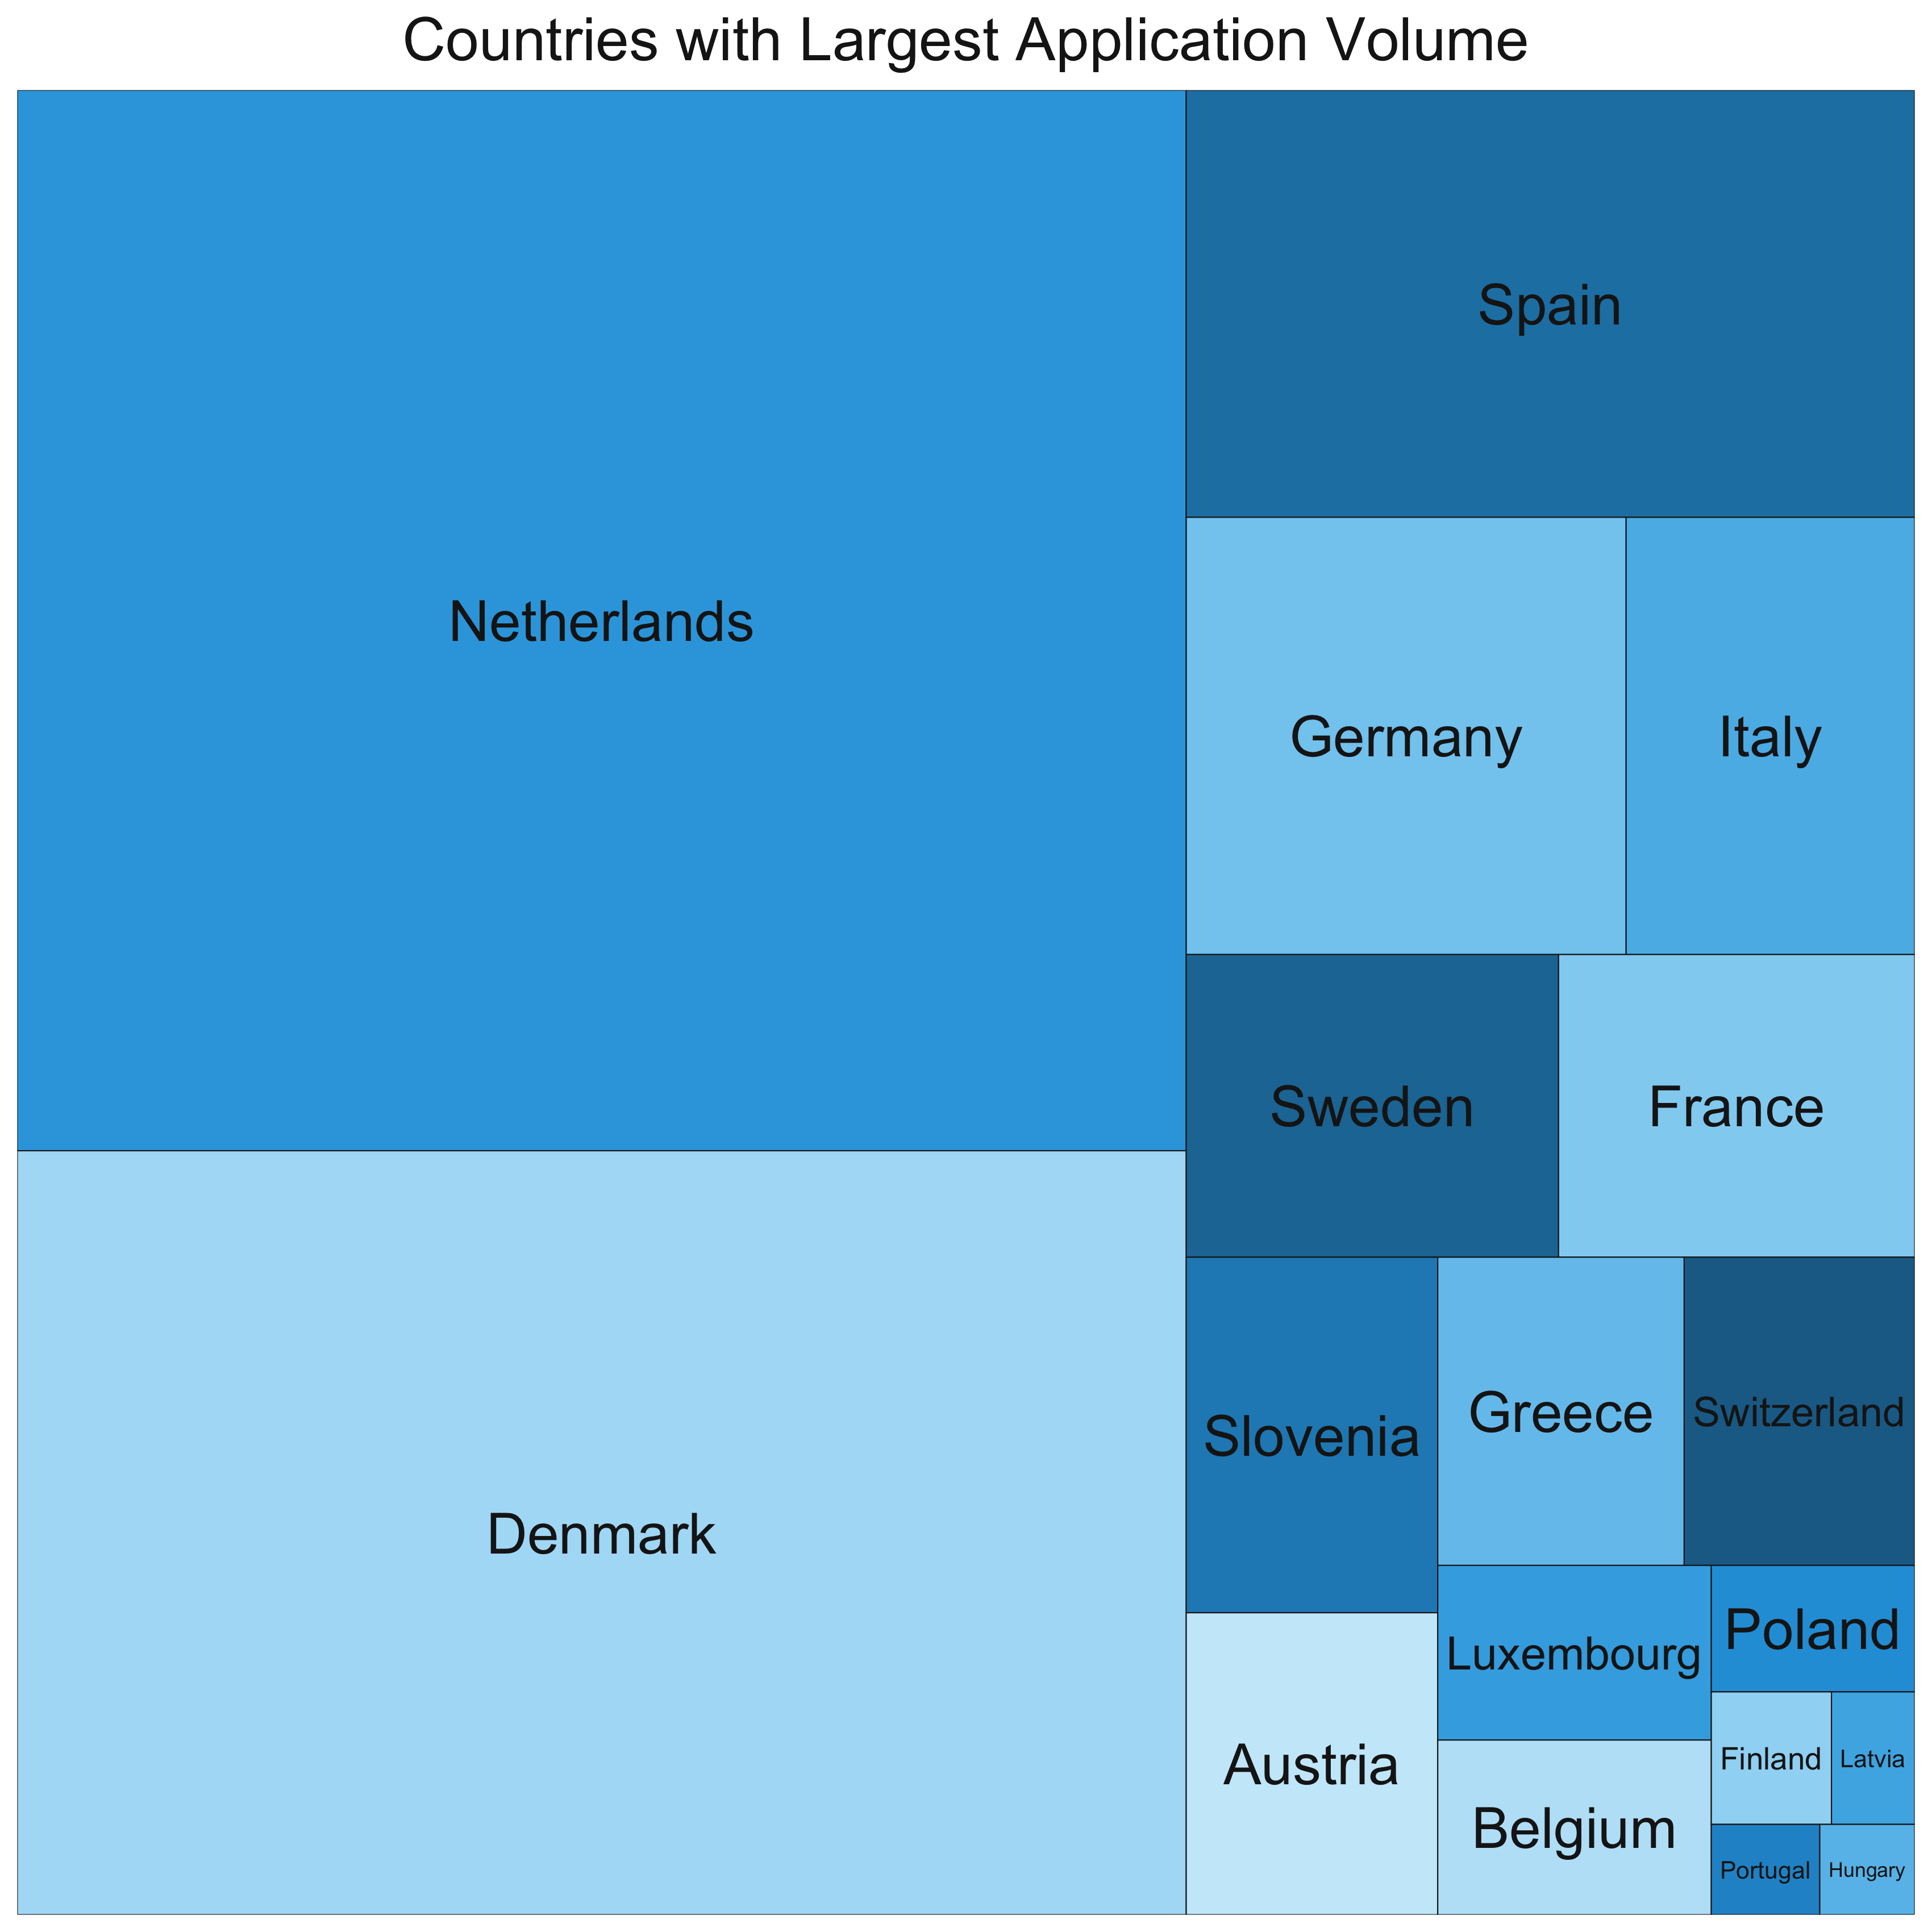

In [112]:
%%R -w 8.5 -h 8.5 --units in -r 400

library(treemapify)

ggplot() +
    geom_treemap(aes(area = Total, fill = Country_y), start = 'topleft', color = 'grey10', data = sch) +
    geom_treemap_text(aes(area = Total, label = Country_y), start = 'topleft', colour = 'grey10', place = 'center', data = sch) +
    labs(title = 'Countries with Largest Application Volume') +
    scale_fill_manual(values = c(li)) + 
    theme(legend.position = 'none', plot.title = element_text(hjust = 0.5, size = 19, color = 'grey10'))

#ggsave('schengen_treemap.png')
                                 
                                 